In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import read_csv

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv('bike_buyers_clean.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [4]:
df.shape

(1000, 13)

In [5]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.908000,1.452000,44.190000
std,5347.333948,31081.609779,1.626094,1.124705,11.353537
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


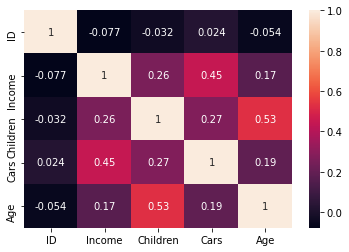

In [7]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
#Analyzing Numerical Variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables
The numerical variables are : ['ID', 'Income', 'Children', 'Cars', 'Age']


In [9]:
# Check missing values in numerical variables
df[numerical].isnull().sum()

ID          0
Income      0
Children    0
Cars        0
Age         0
dtype: int64

In [10]:
#Analyzing Categorical Variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 8 categorical variables
The categorical variables are : ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']


In [11]:
df[categorical].isnull().sum()

Marital Status      0
Gender              0
Education           0
Occupation          0
Home Owner          0
Commute Distance    0
Region              0
Purchased Bike      0
dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Density'>

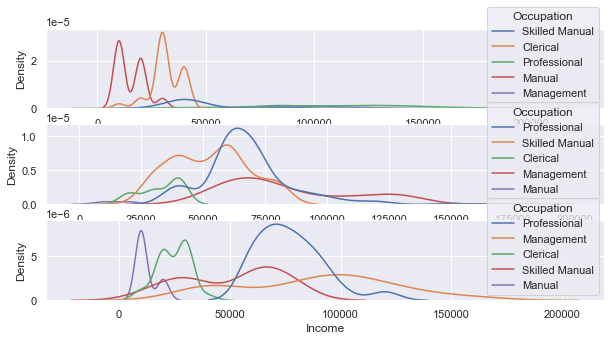

In [12]:
#Sizing The Plot Size
sns.set(rc={'figure.figsize':(10,5)})

#Matplotlib for Subploting
fig, axes = plt.subplots(3,1)

#Subploting Data Showing Income According to Region and Professin 
sns.kdeplot(data = df[df['Region'] == 'Europe'], x = 'Income', hue = 'Occupation', ax = axes[0])
sns.kdeplot(data = df[df['Region']=='North America'],x='Income', hue='Occupation', ax=axes[1])
sns.kdeplot(data = df[df['Region']=='Pacific'],x='Income', hue='Occupation', ax=axes[2])

<AxesSubplot:xlabel='Income', ylabel='Count'>

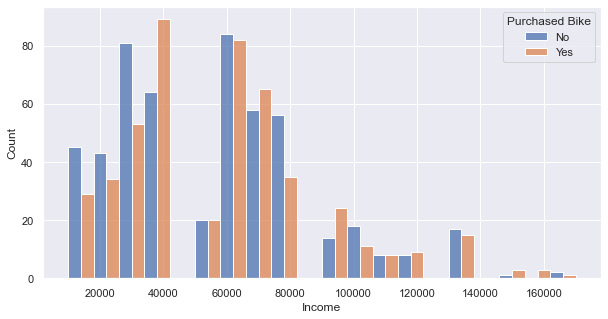

In [13]:
#Income and Purchased Bike relation in histplot.
sns.histplot(data=df , x="Income", hue="Purchased Bike", multiple='dodge')

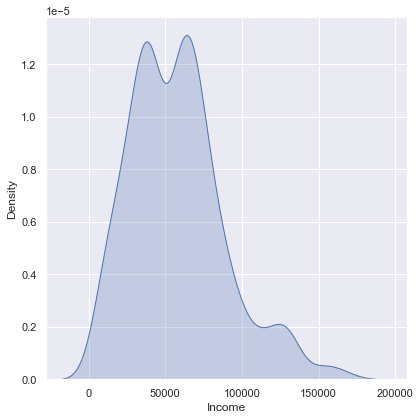

In [14]:
#making a dataset of Bike Purchased people
xx = df[(df['Purchased Bike'] == 'Yes')]
#making a Dataset of Bike Purchased people's Income
xxx = xx['Income']
#Bike Purchased people's Income
sns.displot(data=df, x= xxx, kind='kde', fill=True, height=6, color='b')

<AxesSubplot:xlabel='Age', ylabel='Count'>

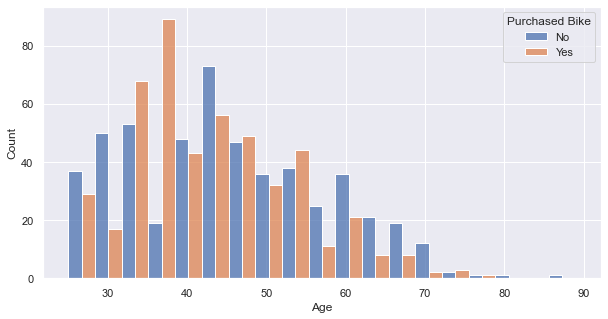

In [15]:
#Age and Purchased Bike relation.
sns.histplot(data=df , x="Age", hue="Purchased Bike", multiple='dodge')

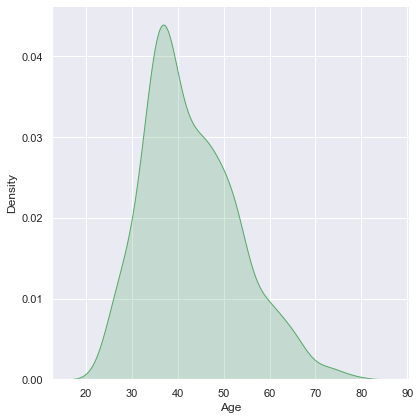

In [16]:
# Making a Dataset Of Bike Purchased People
xx = df[(df['Purchased Bike'] == 'Yes')]
# Making a Dataset Of Bike Purchased People's Income
xxx = xx['Age']
# Showing Bike Purchased People's Income
sns.displot(data=df, x= xxx, kind='kde', fill=True, height=6, color='g')

<AxesSubplot:xlabel='Children', ylabel='Count'>

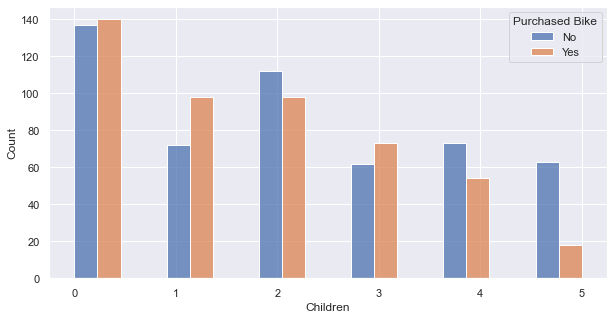

In [17]:
#Children and Purchased Bike relation.
sns.histplot(data=df , x="Children", hue="Purchased Bike", multiple='dodge')

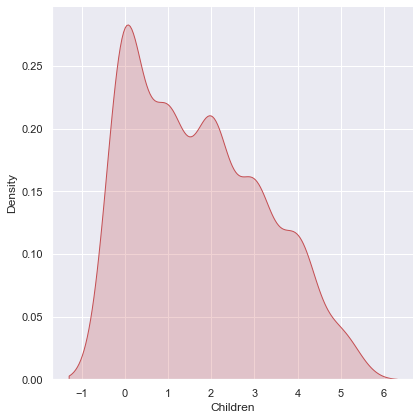

In [18]:
#creating a dataset of Bike Purchased people's Children
ccc = xx['Children']
sns.displot(data=df, x=ccc, kind='kde', fill=True, height=6, color='r')

<AxesSubplot:xlabel='Marital Status', ylabel='Count'>

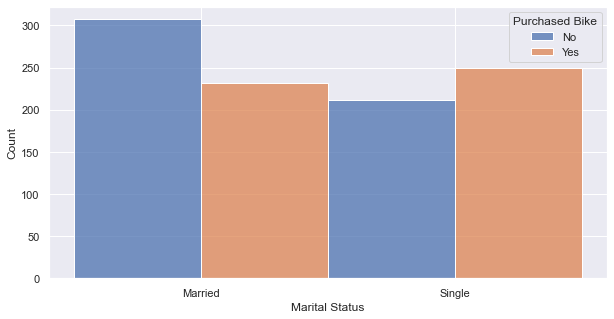

In [19]:
#Marital Status and Purchased Bike relation.
sns.histplot(data=df , x="Marital Status", hue="Purchased Bike", multiple='dodge')

<AxesSubplot:xlabel='Gender', ylabel='Count'>

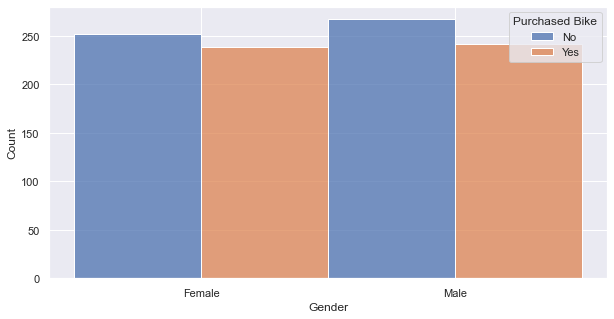

In [20]:
#Gender and Purchased Bike relation.
sns.histplot(data=df , x="Gender", hue="Purchased Bike", multiple='dodge')

<AxesSubplot:xlabel='Education', ylabel='Count'>

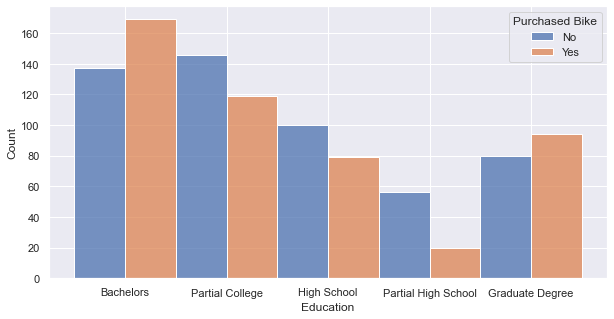

In [21]:
#Education and Purchased Bike relation.
sns.histplot(data=df , x="Education", hue="Purchased Bike", multiple='dodge')

<AxesSubplot:xlabel='Occupation', ylabel='Count'>

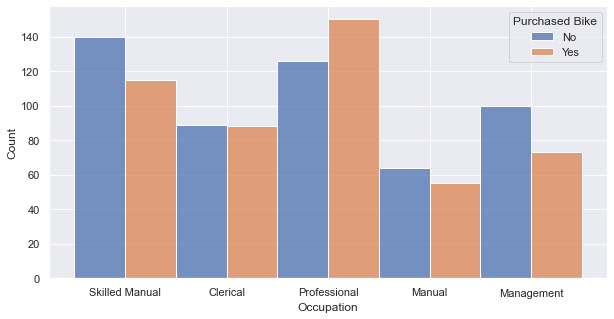

In [22]:
#Occupation and Purchased Bike relation.
sns.histplot(data=df , x="Occupation", hue="Purchased Bike", multiple='dodge')

<AxesSubplot:xlabel='Home Owner', ylabel='Count'>

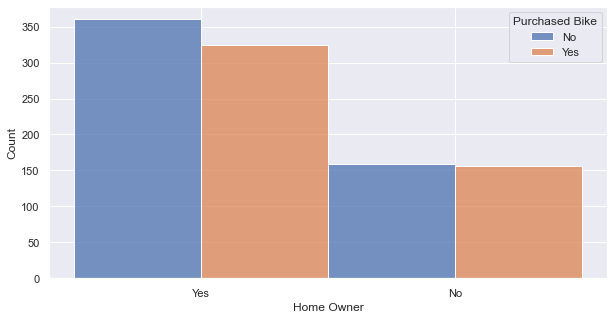

In [23]:
#Home Owner and Purchased Bike relation.
sns.histplot(data=df , x="Home Owner", hue="Purchased Bike", multiple='dodge')

<AxesSubplot:xlabel='Commute Distance', ylabel='Count'>

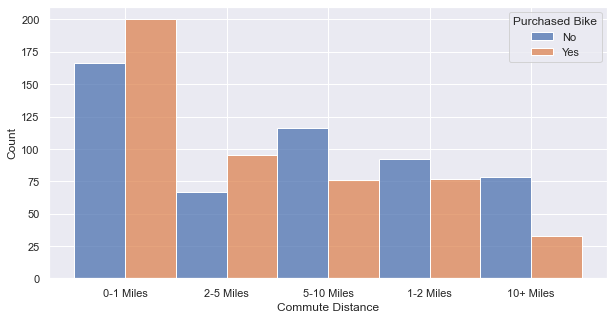

In [24]:
#Commute Distance and Purchased Bike relation.
sns.histplot(data=df , x="Commute Distance", hue="Purchased Bike", multiple='dodge')

<AxesSubplot:xlabel='Region', ylabel='Count'>

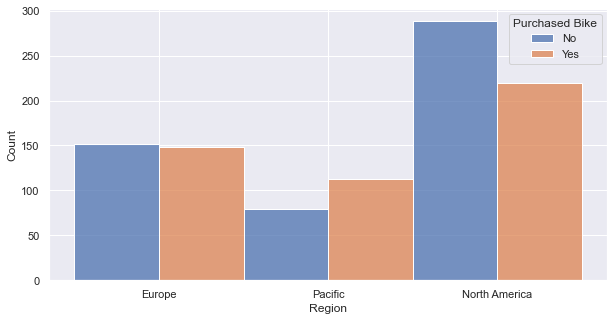

In [25]:
#Region and Purchased Bike relation.
sns.histplot(data=df , x="Region", hue="Purchased Bike", multiple='dodge')

In [26]:
# Droping ID column, it`s not useful.
df = df.drop(columns=["ID"], axis=1, inplace=False)
df

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


In [27]:
#Label encoding
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() 

df['Marital Status'] = le.fit_transform(df['Marital Status'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Education'] = le.fit_transform(df['Education'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Home Owner'] = le.fit_transform(df['Home Owner'])
df['Commute Distance'] = le.fit_transform(df['Commute Distance'])
df['Region'] = le.fit_transform(df['Region'])
df['Purchased Bike'] = le.fit_transform(df['Purchased Bike'])
df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,0,0,40000,1,0,4,1,0,0,0,42,0
1,0,1,30000,3,3,0,1,1,0,0,43,0
2,0,1,80000,5,3,3,0,2,3,0,60,0
3,1,1,70000,0,0,3,1,1,4,2,41,1
4,1,1,30000,0,0,0,0,0,0,0,36,1


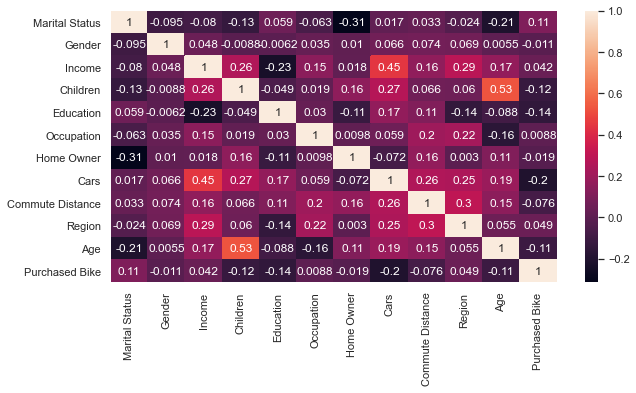

In [28]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Creating train and test data

In [29]:
X = df.drop(['Purchased Bike'], axis=1)
y = df['Purchased Bike'] 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 999)
X_train.shape, X_test.shape

((800, 11), (200, 11))

In [31]:
X_train.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
409,0,0,130000,3,3,3,1,4,0,0,52
649,1,0,70000,0,0,3,0,1,3,1,38
110,1,0,20000,1,3,2,0,0,0,0,46
503,0,0,130000,1,0,1,1,4,3,1,44
520,1,1,100000,1,3,3,0,3,1,1,44


### Decision Tree Classifier

In [32]:
#Creatind Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=999)

#Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test)

In [33]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Model accuracy score: 0.6350


In [34]:
y_pred_train2 = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train2)))

Training-set accuracy score: 0.6625


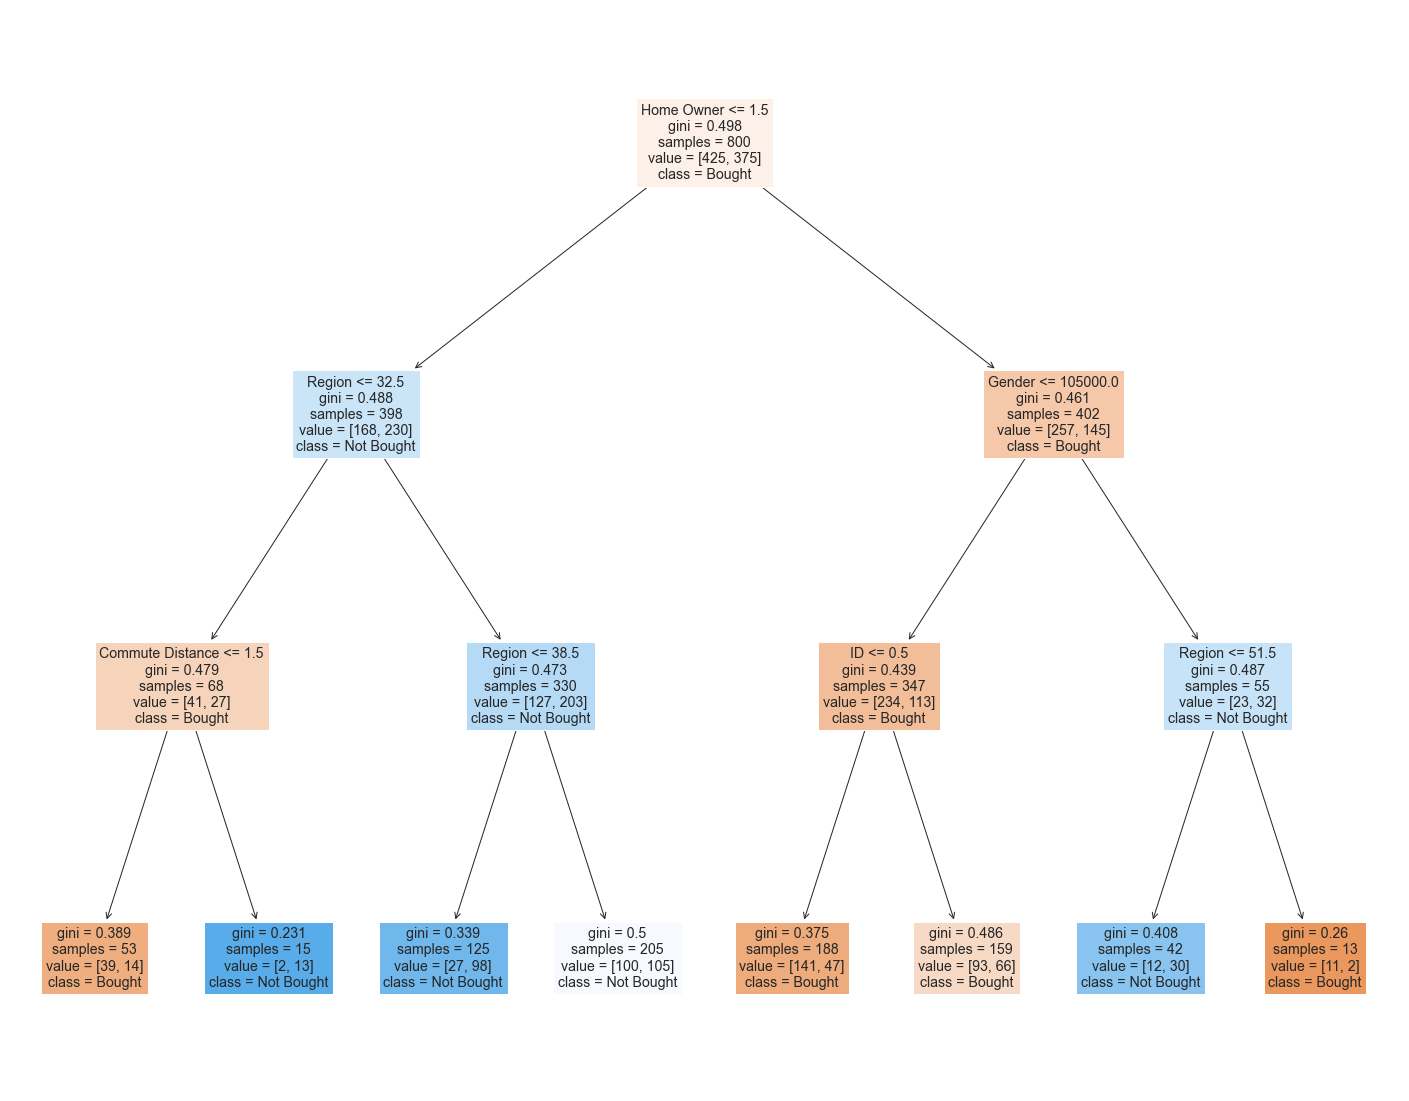

In [35]:
from sklearn import tree

fn=['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age']
cn=['Bought', 'Not Bought']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = fn, 
               class_names=cn, filled=True)

Improving Accuracy using Grid Search¶

In [36]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
grid_values = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 
               'max_depth':[4,5,6,7,8,9,10], 'min_samples_split': [2,3,4]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4]})

In [37]:
y_pred_acc = grid_clf_acc.predict(X_test)

# New model evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))

#Confusion matrix
cm = confusion_matrix(y_test,y_pred_acc)
print(cm)

Accuracy Score : 0.615
[[56 38]
 [39 67]]


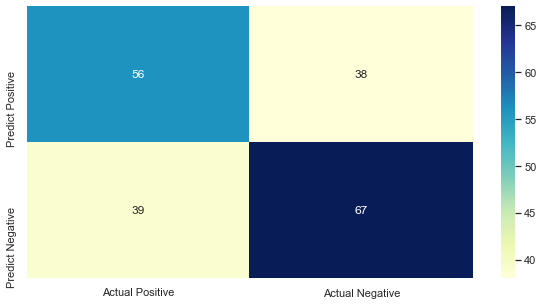

In [38]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60        94
           1       0.65      0.68      0.66       106

    accuracy                           0.64       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.63      0.64      0.63       200



### Random Forest Classifier¶

In [40]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train) 
result = model_rfc.score(X_test, y_test)

print('Model accuracy score: {0:0.4f}'. format(result))

Model accuracy score: 0.7800


In [41]:
from sklearn.metrics import make_scorer, accuracy_score

rfc = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Run the grid search
grid_obj = GridSearchCV(rfc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rfc to the best combination of parameters
rfc = grid_obj.best_estimator_

# Fit the best algorithm to the data
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=3,
                       n_estimators=6)

In [42]:
y_pred4 = grid_clf_acc.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred4)))

Model accuracy score: 0.6150


### XGBoost Classifier¶

In [43]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:46:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy score: 0.7100


### CatBoost

In [44]:
!pip install catboost
import catboost

In [45]:
print(catboost.__version__)

1.0.4


In [46]:
from catboost import CatBoostClassifier

In [47]:
%%time
SEED = 1
params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'verbose': 200, # output to out info about training process every 200 iterations
          'random_seed': SEED
         }
cbc_1 = CatBoostClassifier(**params)
cbc_1.fit(X_train, y_train, # data to train on (required parameters)
          eval_set=(X_test, y_test), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True # True for visualization of the training process
         );


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.02999
0:	test: 0.6778402	best: 0.6778402 (0)	total: 138ms	remaining: 2m 17s
200:	test: 0.8078583	best: 0.8078583 (200)	total: 677ms	remaining: 2.69s
400:	test: 0.8152348	best: 0.8175432 (334)	total: 1.19s	remaining: 1.77s
600:	test: 0.8202529	best: 0.8214572 (539)	total: 1.76s	remaining: 1.17s
800:	test: 0.8204536	best: 0.8234645 (667)	total: 2.29s	remaining: 569ms
999:	test: 0.8228623	best: 0.8234645 (667)	total: 2.89s	remaining: 0us

bestTest = 0.8234644721
bestIteration = 667

Shrink model to first 668 iterations.
Wall time: 4.37 s


Model predictions 


In [48]:
y_pred = cbc_1.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7400


#### Building a Stack for Classification

In [49]:
!pip install vecstack
from vecstack import stacking

In [50]:
models = [
    
    rfc,
        
    model_xgb,
    
    cbc_1
]

In [51]:
S_train, S_test = stacking(models, #  he first level models defined earlier                  
                           X_train, y_train, X_test,   
                           regression=False, #boolean indicating do we want to use the function for regression. In our case 'False',this is a classification
                           mode='oof_pred_bag',#using the earlier describe out-of-fold during cross-validation
       
                           needs_proba=False, #boolean indicating whether you need the probabilities of class labels
                                    
                           save_dir=None, #save the result to directory Boolean
            
                           metric=accuracy_score, #what evaluation metric to use
    
                           n_folds=4, #how many folds to use for cross-validation
                 
                           stratified=True,#whether to use stratified cross-validation
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)#2 here refers to printing all info

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestClassifier]
    fold  0:  [0.62000000]
    fold  1:  [0.59500000]
    fold  2:  [0.63000000]
    fold  3:  [0.66000000]
    ----
    MEAN:     [0.62625000] + [0.02328492]
    FULL:     [0.62625000]

model  1:     [XGBClassifier]
[17:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


    fold  0:  [0.69000000]
[17:47:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


    fold  1:  [0.69000000]
[17:47:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


    fold  2:  [0.64500000]
[17:47:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


    fold  3:  [0.69000000]
    ----
    MEAN:     [0.67875000] + [0.01948557]
    FULL:     [0.67875000]

model  2:     [CatBoostClassifier]
Learning rate set to 0.008283
0:	total: 2.48ms	remaining: 2.47s
200:	total: 444ms	remaining: 1.76s
400:	total: 872ms	remaining: 1.3s
600:	total: 1.3s	remaining: 861ms
800:	total: 1.74s	remaining: 433ms
999:	total: 2.17s	remaining: 0us
    fold  0:  [0.69000000]
Learning rate set to 0.008283
0:	total: 2.4ms	remaining: 2.4s
200:	total: 463ms	remaining: 1.84s
400:	total: 889ms	remaining: 1.33s
600:	total: 1.32s	remaining: 880ms
800:	total: 1.76s	remaining: 438ms
999:	total: 2.19s	remaining: 0us
    fold  1:  [0.70000000]
Learning rate set to 0.008283
0:	total: 2.23ms	remaining: 2.23s
200:	total: 445ms	remaining: 1.77s
400:	total: 883ms	remaining: 1.32s
600:	total: 1.32s	remaining: 874ms
800:	total: 1.75s	remaining: 436ms
999:	total: 2.2s	remaining: 0us
    fold  2:  [0.66500000]
Learning rate set to 0.008283
0:	total: 2.17ms	remaining: 2.17s
200:	tot

Let's fit the second level model on our predictions to make our final predictions. Iinstead of using X_train to train our model, we are using our predictions S_train.

In [52]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

[17:47:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Final prediction score: [0.74500000]


Using vecstacks’ stacking automation, we’ve managed to predict the correct wine cultivar with an accuracy of approximately 74,5%! It's not perfect according to limitations of the initial dataset, but this is the best result!